#### Import necessary modules

In [1]:
import os

import pandas as pd
import matplotlib.pyplot as plt

from ManipDFStats import get_ranked_df, get_ranked_pos_df, remove_stat_outliers

#### Need to select folder for data

In [2]:
folder = 'depth2'


path = f'./{folder}/'
data_path = f'{path}data/'

In [3]:
rank_order = ['Iron 1', 'Iron 2', 'Iron 3', 
              'Bronze 1', 'Bronze 2', 'Bronze 3',
              'Silver 1', 'Silver 2', 'Silver 3',
              'Gold 1', 'Gold 2', 'Gold 3',
              'Platinum 1', 'Platinum 2', 'Platinum 3',
              'Diamond 1', 'Diamond 2', 'Diamond 3',
              'Immortal 1', 'Immortal 2', 'Immortal 3',
              'Radiant']

## Clean up the data

In [4]:
df = pd.read_csv(f'{data_path}total_accounts_list.csv')

print(df.shape[0])
df.head()

7519


,User,Tag,Rank,Position,KD,Assists,Headshot %,Ability Usage
0,Shaymxn,9770,NaN,Flex,3.0000,0.0,50.0000,4.0
1,BleachIsClean,NA1,Diamond 2,Duelist,1.4209,4.4,15.7172,49.4
2,LePastaMasta,7536,NaN,Flex,0.9333,7.0,16.9492,22.0
3,faygo,4335,Bronze 1,Flex,0.8000,4.0,10.6061,36.0
4,PoopScoop69420,9576,Bronze 3,Flex,1.1715,5.0,0.0000,0.0


#### Delete any account that has no account statistics

In [5]:
nan_df = df[df.isna().any(axis=1)]
print(nan_df.shape[0])
nan_df.head()

530


,User,Tag,Rank,Position,KD,Assists,Headshot %,Ability Usage
0,Shaymxn,9770,NaN,Flex,3.0000,0.0,50.0000,4.0
2,LePastaMasta,7536,NaN,Flex,0.9333,7.0,16.9492,22.0
7,S0RAST0NE,2284,NaN,Flex,0.9463,4.8,7.4903,16.6
12,CopperKepp,5111,Silver 2,Flex,NaN,NaN,NaN,NaN
23,CP1923,9552,Iron 3,Flex,NaN,NaN,NaN,NaN


In [6]:
df = df.dropna(how='any')
print(df.shape[0])
df.head()

6989


,User,Tag,Rank,Position,KD,Assists,Headshot %,Ability Usage
1,BleachIsClean,NA1,Diamond 2,Duelist,1.4209,4.4,15.7172,49.4
3,faygo,4335,Bronze 1,Flex,0.8000,4.0,10.6061,36.0
4,PoopScoop69420,9576,Bronze 3,Flex,1.1715,5.0,0.0000,0.0
5,Qwisque,9685,Iron 1,Flex,0.2353,4.0,6.8182,29.0
6,Munji06,NA1,Silver 1,Flex,0.9269,5.0,7.4074,21.0


#### Remove statistical outliers from each rank

In [7]:
df = remove_stat_outliers(df)
print(df.shape[0])
df.head()

6438


,User,Tag,Rank,Position,KD,Assists,Headshot %,Ability Usage
5,Qwisque,9685,Iron 1,Flex,0.2353,4.0,6.8182,29.0
62,chiakinanami,6013,Iron 1,Flex,0.6000,0.0,4.7619,6.0
128,that1S1mp,7800,Iron 1,Duelist,0.6853,2.6,7.2727,14.2
131,2332,7114,Iron 1,Controller,1.0667,3.8,11.8242,20.8
199,ColeDaMole22,8315,Iron 1,Controller,0.5037,4.6,7.8112,33.6


## Get Aggregate Statistics by rank (and position)

#### Group by rank (and position)

In [8]:
def plot_avg_value(stat, group, x, y):
    plt.errorbar(x, y['mean'][stat], y['std'][stat], fmt='go-', 
                 ecolor='g', lw=2, capsize=2, capthick=2)

    plt.xticks(rank_order, rotation='vertical', size=8)
    plt.ylabel(f'Avg {stat} per {group}')
    plt.xlabel('Rank')
    plt.savefig(f'{path}{stat}_rank.png')
    plt.show()

In [9]:
ranked_df = get_ranked_df(df)

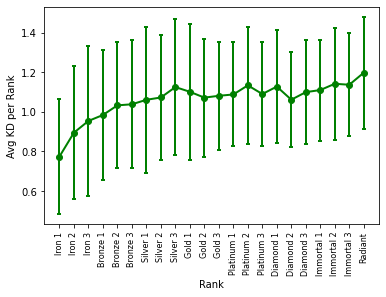

In [10]:
plot_avg_value('KD', 'Rank', rank_order, ranked_df)

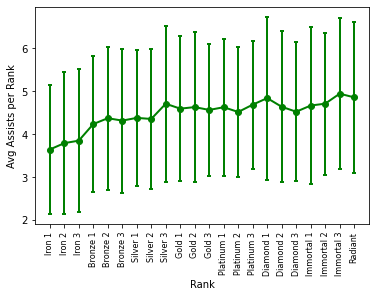

In [11]:
plot_avg_value('Assists', 'Rank', rank_order, ranked_df)

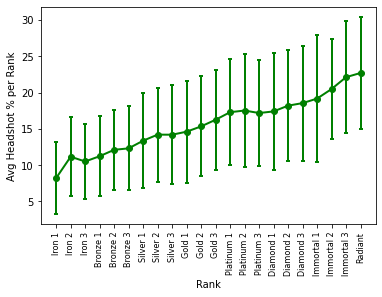

In [12]:
plot_avg_value('Headshot %', 'Rank', rank_order, ranked_df)

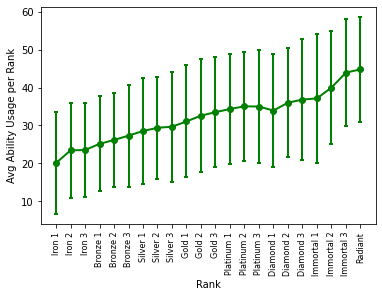

In [13]:
plot_avg_value('Ability Usage', 'Rank', rank_order, ranked_df)

In [14]:
def plot_avg_value_per_position(stat, group, x, y):
    
    colors = ['g', 'b', 'r', 'm', 'k']
    i = 0
    
    for position in y:
        plt.errorbar(x, y[position]['mean'][stat], y[position]['std'][stat], fmt=f'{colors[i]}o-', 
                 ecolor=colors[i], lw=2, capsize=2, capthick=2)
        i += 1
    
    plt.legend(['Duelist', 'Initiator', 'Sentinel', 'Controller', 'Flex'], loc=2)
    plt.xticks(rank_order, rotation='vertical', size=8)
    plt.ylabel(f'Avg {stat} per {group}')
    plt.xlabel(group)
    plt.savefig(f'{path}{stat}_rank_pos.png')
    plt.show()

In [15]:
ranked_pos_df = get_ranked_pos_df(df)

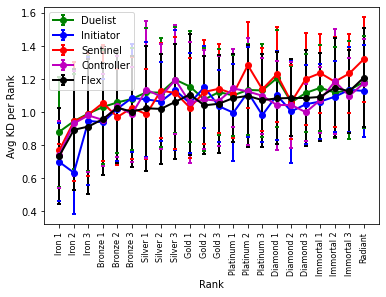

In [16]:
plot_avg_value_per_position('KD', 'Rank', rank_order, ranked_pos_df)

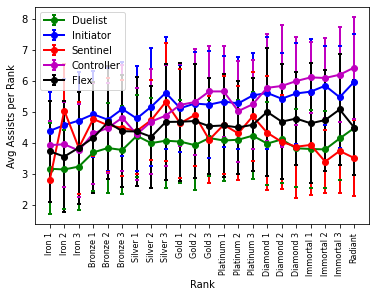

In [17]:
plot_avg_value_per_position('Assists', 'Rank', rank_order, ranked_pos_df)

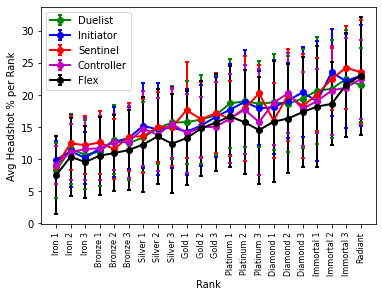

In [18]:
plot_avg_value_per_position('Headshot %', 'Rank', rank_order, ranked_pos_df)

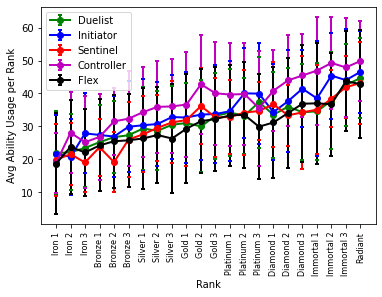

In [19]:
plot_avg_value_per_position('Ability Usage', 'Rank', rank_order, ranked_pos_df)

## Export model numbers